<a href="https://colab.research.google.com/github/adiratnatyas10/Mini-Project/blob/main/UAS_Analitika_Data_3333210031_Adiratna_Candraningtyas_Kelas_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

- Pandas : is a popular library for data processing and analysis in Python. The main functions of pandas in coding are reading and writing data, manipulating and cleaning data, analyzing and exploring data, merging and changing data structures.
- NumPy: can perform efficient numerical computations and manipulate numerical data easily in Python code.
- Matplotlib.pyplot is a submodule of the Matplotlib library that is used to create graph and plot visualizations in Python. its functions are to create Graphs and Plots, set Graph Views. It can be used to create various types of graphs such as line graphs, scatter plots, bar plots, and histograms.
- Seaborn : is used to create interesting and informative data visualizations.
- math : is used to import the built-in math module, which can access the math functions provided by the math module to perform complex mathematical operations.
- datetime is used to import the built-in datetime module that can access classes and functions related to handling dates, times, and datetime








**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/evangower/robinhood-stock-data

upload the selected datasets from kaggle.

---
This contains the historical stock price of Robinhood (ticker symbol HOOD) an American financial services company headquartered in Menlo Park, California, that facilitates commission-free trades of stocks, exchange-traded funds and cryptocurrencies via a mobile app introduced in March 2015.

The company went public on the Nasdaq on July 29, 2021, under the stock ticker HOOD. The opening price was 38 dollar, but dropped shortly afterwards to a low of 33.35 dollar before starting to recover, reaching an all time high at $85. Subsequently, it fell sharply again after facing growing regulatory uncertainty, plunging on Q3 earnings and disclosing that a security breach affected 7 million customers.


In [2]:
# https://drive.google.com/file/d/1lHd4wkZiSiEixFrND50PcyIHta68KnmN/view?usp=sharing

!gdown 16XT6QzaU2P1XzB8ptuJGlJkMVVgoC7cH

Downloading...
From: https://drive.google.com/uc?id=16XT6QzaU2P1XzB8ptuJGlJkMVVgoC7cH
To: /content/GOOGL.csv
100% 174k/174k [00:00<00:00, 91.3MB/s]


import datasets that have been uploaded on the goodgle drive.

In [41]:
train_data = pd.read_csv('HOOD.csv')
train_data.head()

,date,close_last,volume,open,high,low
0,08-19-2022,9.26,13783770,9.85,9.88,9.19
1,08-18-2022,10.17,9525442,10.33,10.42,9.94
2,08-17-2022,10.42,9287033,10.75,10.82,10.31
3,08-16-2022,10.90,20413430,11.03,11.59,10.62
4,08-15-2022,11.01,7086896,10.79,11.19,10.79


- train_data = pd.read_csv('HOOD.csv'): This statement is used to read a CSV file named "HOOD.csv" and load its data into a DataFrame stored in the train_data variable.
- train_data.head(): This statement is used to display the first few rows of the previously read train_data DataFrame.

Check missing values

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        268 non-null    object 
 1   close_last  268 non-null    float64
 2   volume      268 non-null    int64  
 3   open        268 non-null    float64
 4   high        268 non-null    float64
 5   low         268 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 12.7+ KB


The train_data.info() function in the code is used to display information about the train_data DataFrame, including the number of rows and columns, the data type of each column, and the number of non-null (non-missing) values in each column.
for the results there is no missing value data because the data is the same

Check statistic vales for every features

In [5]:
train_data.describe()

,close_last,volume,open,high,low
count,268.000000,2.680000e+02,268.000000,268.000000,268.000000
mean,21.563172,1.829024e+07,21.616828,22.422090,20.867388
std,14.504176,1.747820e+07,14.544167,15.315572,14.047383
min,6.890000,2.579553e+06,6.840000,7.140000,6.810000
25%,10.297500,9.255350e+06,10.330000,10.635000,9.925000
50%,13.515000,1.468959e+07,13.530000,14.125000,13.225000
75%,35.447500,2.185986e+07,35.917500,37.035000,34.612500
max,70.390000,1.757905e+08,62.900000,85.000000,56.000000


The train_data.describe() function in the code is used to generate summary statistics from the train_data DataFrame. This function will provide statistical information such as count, mean, standard deviation, minimum value, quartile, and maximum value of each numeric column in the DataFrame.

Handle datetime data for time series

In [6]:
train_data['date'] = pd.to_datetime(train_data['date'])
train_data.set_index('date', inplace=True)
train_data.head()

,close_last,volume,open,high,low
date,,,,,
2022-08-19,9.26,13783770,9.85,9.88,9.19
2022-08-18,10.17,9525442,10.33,10.42,9.94
2022-08-17,10.42,9287033,10.75,10.82,10.31
2022-08-16,10.90,20413430,11.03,11.59,10.62
2022-08-15,11.01,7086896,10.79,11.19,10.79


- train_data['date'] = pd.to_datetime(train_data['date']) : used to convert the 'date' column in DataFrame train_data to datetime data type. The pd.to_datetime() function of the pandas module is used to convert the values in the 'date' column into datetime objects. After conversion, the 'date' column will contain values interpreted as date and time.
- train_data.set_index('date', inplace=True) : used to set the 'date' column as the index of the train_data DataFrame. By using the set_index() method, it is possible to specify the column to be used as the index. The inplace=True argument is used to modify the original DataFrame without creating a new copy. Once executed, the DataFrame index will be the 'date' column.
- train_data.head() : This statement is used to display the first few rows of the modified train_data DataFrame. After setting the 'date' column as the index, the first rows of the DataFrame will be displayed with the index based on the date.

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

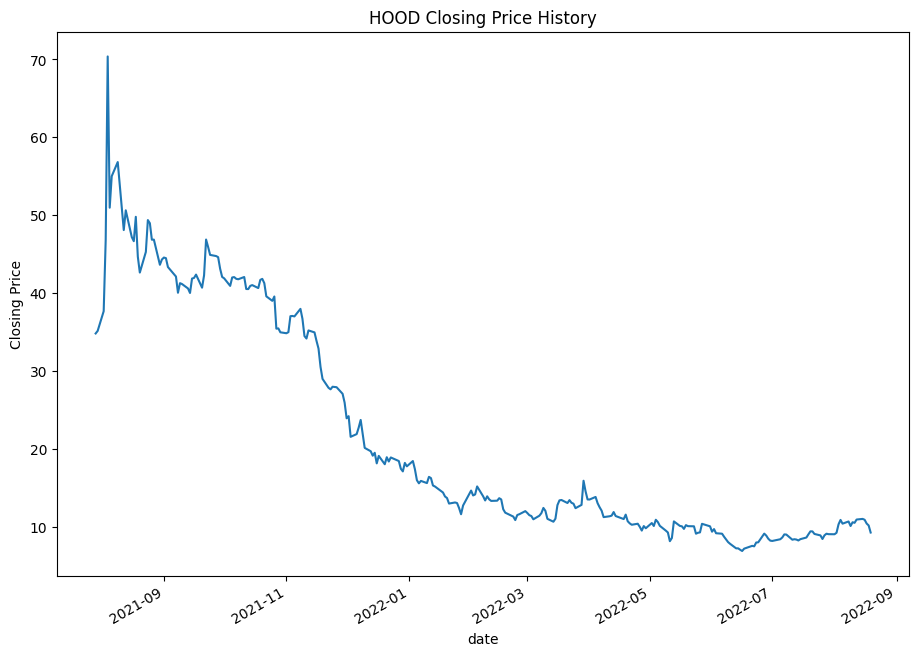

In [7]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['close_last'].plot()
plt.title('HOOD Closing Price History') # adding a title
plt.xlabel('date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

The codingan is creates a plot of the 'close_last' column data in the train_data DataFrame. The plot has a title, x and y axis labels, and a pre-set size. Once the plot configuration is complete, the plot is displayed using plt.show().

Based on the graph above, it is included in the downward trend, which occurs when there is a movement of data from time to time that continues to decline.

<Figure size 1600x800 with 0 Axes>

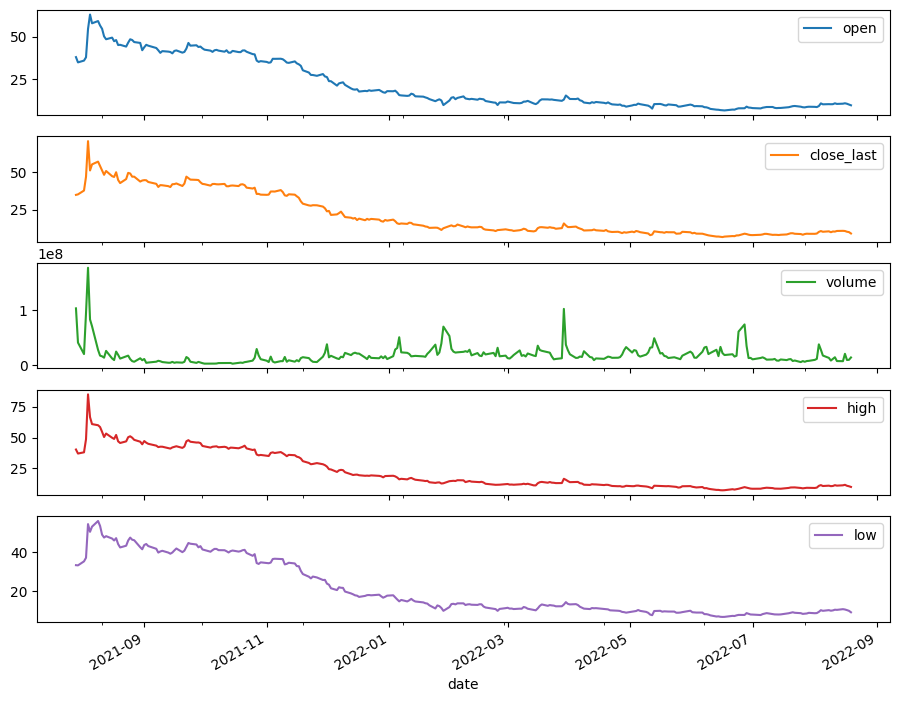

In [8]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['open', 'close_last', 'volume', 'high', 'low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

The coding creates multiple subplots from the columns specified in the cols list of the train_data DataFrame. Each subplot will have a pre-set size. Once the subplot configuration is complete, the plot is displayed using plt.show().

Based on the graph above, it can be seen that the open, close_last, high and low charts are included in the downward trend, while the volume chart is included in the horizontal trend.

In [9]:
train_data['HL_PCT'] = (train_data['high'] - train_data['low']) / train_data['low'] * 100.0
train_data['PCT_change'] = (train_data['close_last'] - train_data['open']) / train_data['open'] * 100.0

The coding is used to calculate and add two new columns, 'HL_PCT' (percentage change in high-low range) and 'PCT_change' (percentage change in closing and opening prices), to the train_data DataFrame.

In [10]:
df = train_data[['HL_PCT', 'PCT_change', 'close_last','volume']]

df = train_data[['HL_PCT', 'PCT_change', 'close_last','volume']] : this code creates a new DataFrame named df that contains a subset of the 'HL_PCT', 'PCT_change', 'close_last', and 'volume' columns of the train_data DataFrame. In this statement, indexing train_data[['HL_PCT', 'PCT_change', 'close_last','volume']] results in a subset DataFrame containing only the mentioned columns. This DataFrame subset is then assigned to the variable df.

In [11]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['close_last'].shift(-forecast_out)

14


<ipython-input-11-64023fab5dc6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['close_last'].shift(-forecast_out)


With the above coding, it can be used to calculate the number of rows to be used for forecasting based on a certain percentage of the dataset, the percentage used is 5%. Then, the value is printed and used to create a 'label' column in DataFrame df that contains the 'close_last' value shifted up.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

The code imports modules and classes required to perform data preprocessing, build regression models using various algorithms, split datasets, and measure model performance using relevant evaluation metrics.

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [13]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-13-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


coding above, the features in X will be converted to a similar scale using StandardScaler. This is useful to ensure that each feature has an equal contribution in the learning process of the machine learning model. Feature scaling also helps to reduce the impact of different scale variability on model performance.

In [14]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

- X_Predictions = X[-forecast_out:]: Selects the last row forecast_out from the X data and assigns it to the X_Predictions variable. This statement retrieves the last data of X to be used as the data to be predicted.
- X = X[:-forecast_out]: Removes the last row of forecast_out from the X data and reassigns it to the X variable. This statement retrieves all data except the last row of forecast_out from X, which will be used as the training data.

In [15]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-15-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


The coding is that the data with missing values is removed from the DataFrame df, and the target value y is set by taking the 'label' column from the DataFrame that has had the missing values removed. This is important because the presence of missing values can affect the quality of the machine learning model, and the target data must match the feature data that has been processed and is ready to be used in the model training process.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using the above coding, the feature data and target data are divided into training and testing subsets. The training subset (X_train and y_train) will be used to train the model, while the testing subset (X_test and y_test) will be used to test the performance of the model. This division helps in performing an objective evaluation of the model's performance on data that has never been seen before.





In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In the above coding, there are statements that use the LinearRegression class from scikit-learn to create a linear regression model, train the model using the training subset, and calculate the confidence score on the testing subset. This confidence score provides information about the extent to which the model fits the testing data, where higher values indicate a better fit.

In [18]:
lr_confidence

0.9288193224553227

In the coding, lr_confidence is a variable that stores the confidence score of the linear regression model (lr) on the feature testing data (X_test) and target testing data (y_test). That is, the value stored in the lr_confidence variable indicates the extent to which the linear regression model fits the testing data.

In [19]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In the above coding, there is a statement that uses the RandomForestRegressor class from scikit-learn to create a random forest regression model, train the model using the training subset, and calculate the confidence score on the testing subset.

In [20]:
rf_confidence

0.9663969700739866

In the coding, rf_confidence is a variable that stores the confidence score of the random regression model (rf) on the feature testing data (X_test) and target testing data (y_test). That is, the value stored in the rf_confidence variable indicates the extent to which the random regression model fits the testing data.

In [21]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-21-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-21-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-21-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

Using the above coding, predict the forecast value using the random regression model (rf) on the X_Predictions feature data. The prediction result is then added to the df DataFrame by adding a new row with the appropriate date and filling the prediction value in the 'Forecast' column.

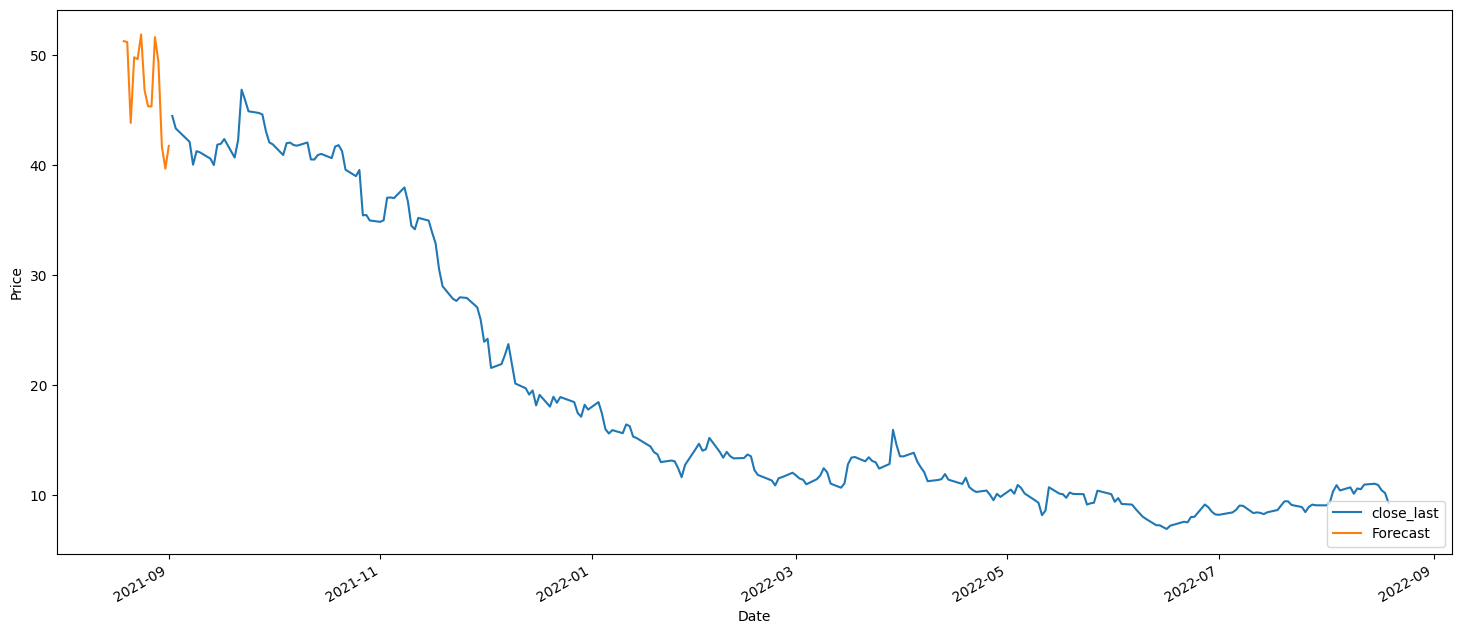

In [22]:
plt.figure(figsize=(18, 8))
df['close_last'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

The above coding is used to perform plot visualization for the 'close_last' and 'Forecast' columns in the DataFrame df. The plot line shows the change in the closing price as well as the future price prediction. Displayed on the x and y axis labels given on the plot before finally displaying the plot.

The blue line shows the pre-existing close_last price data, and the orange line is the forecast result

